In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings

In [2]:
# Loading Dataset
df = pd.read_csv('diabetes_modif.csv')
df1 = pd.read_csv('diabetes.csv')

In [3]:
# Finding number of rows and column
df1.shape

(253680, 22)

In [4]:
# Description of Dataset 
df1.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


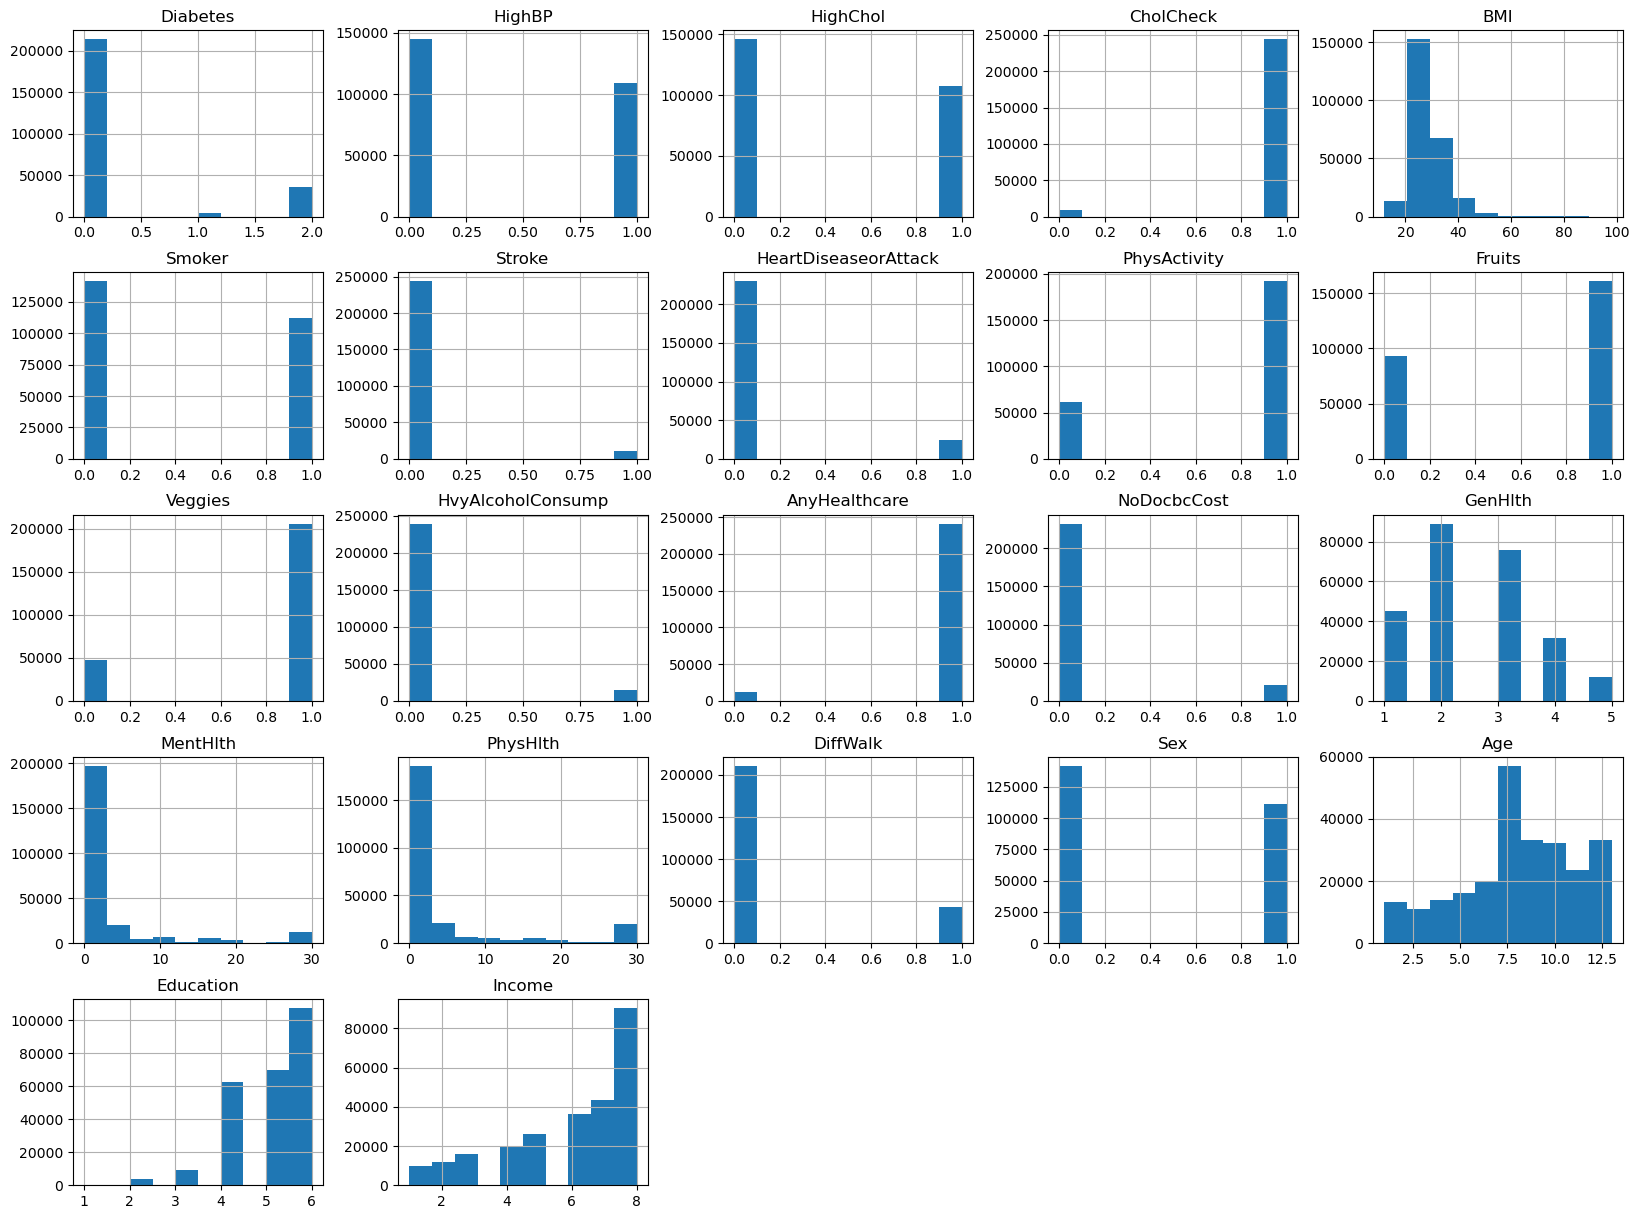

In [6]:
#using histogram to understand dataset df better

df1.hist(figsize=(20,15));

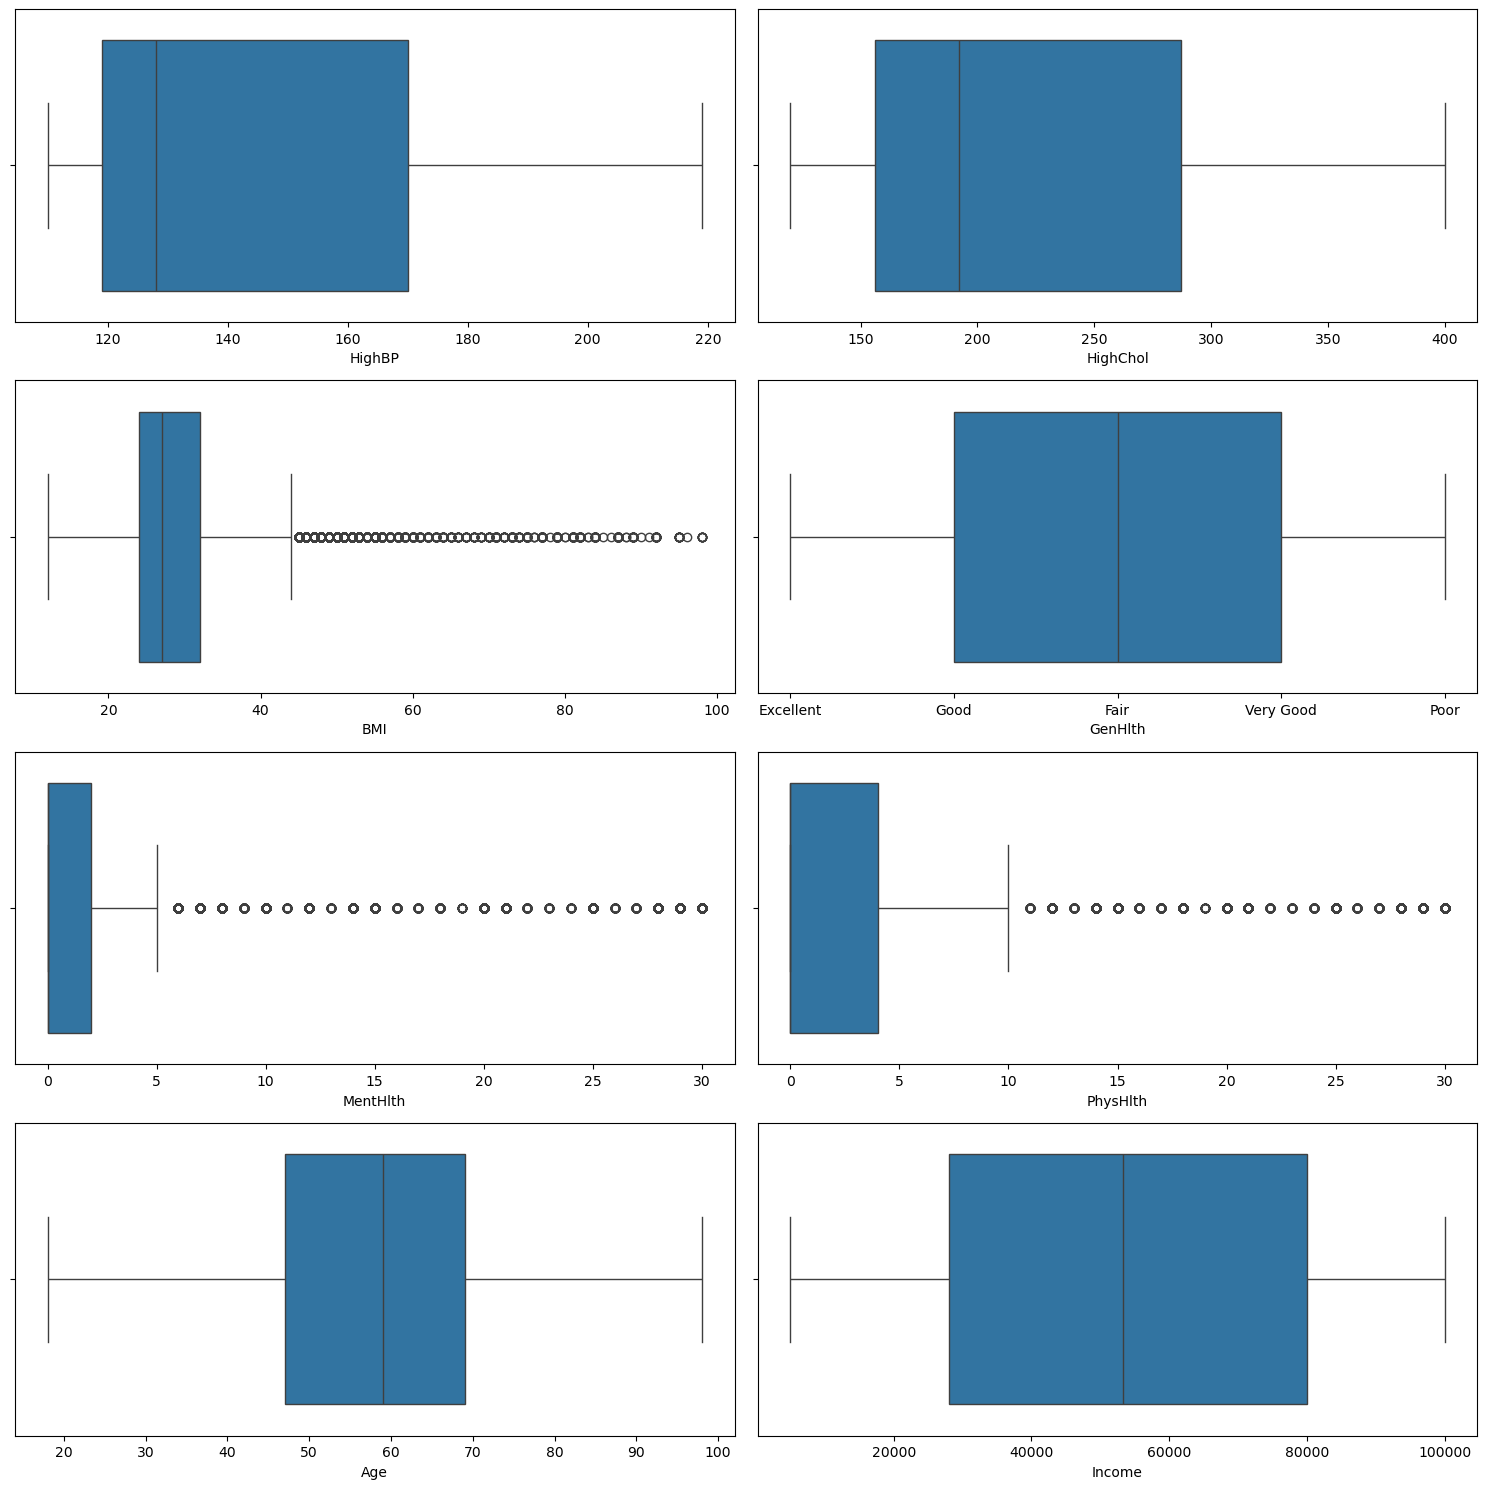

In [10]:
# Boxplots to find outliers from columns having Continuous values
plt.figure(figsize = (15,15))
for i,col in enumerate(['HighBP', 'HighChol','BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df, hue=None)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'correlation of features')

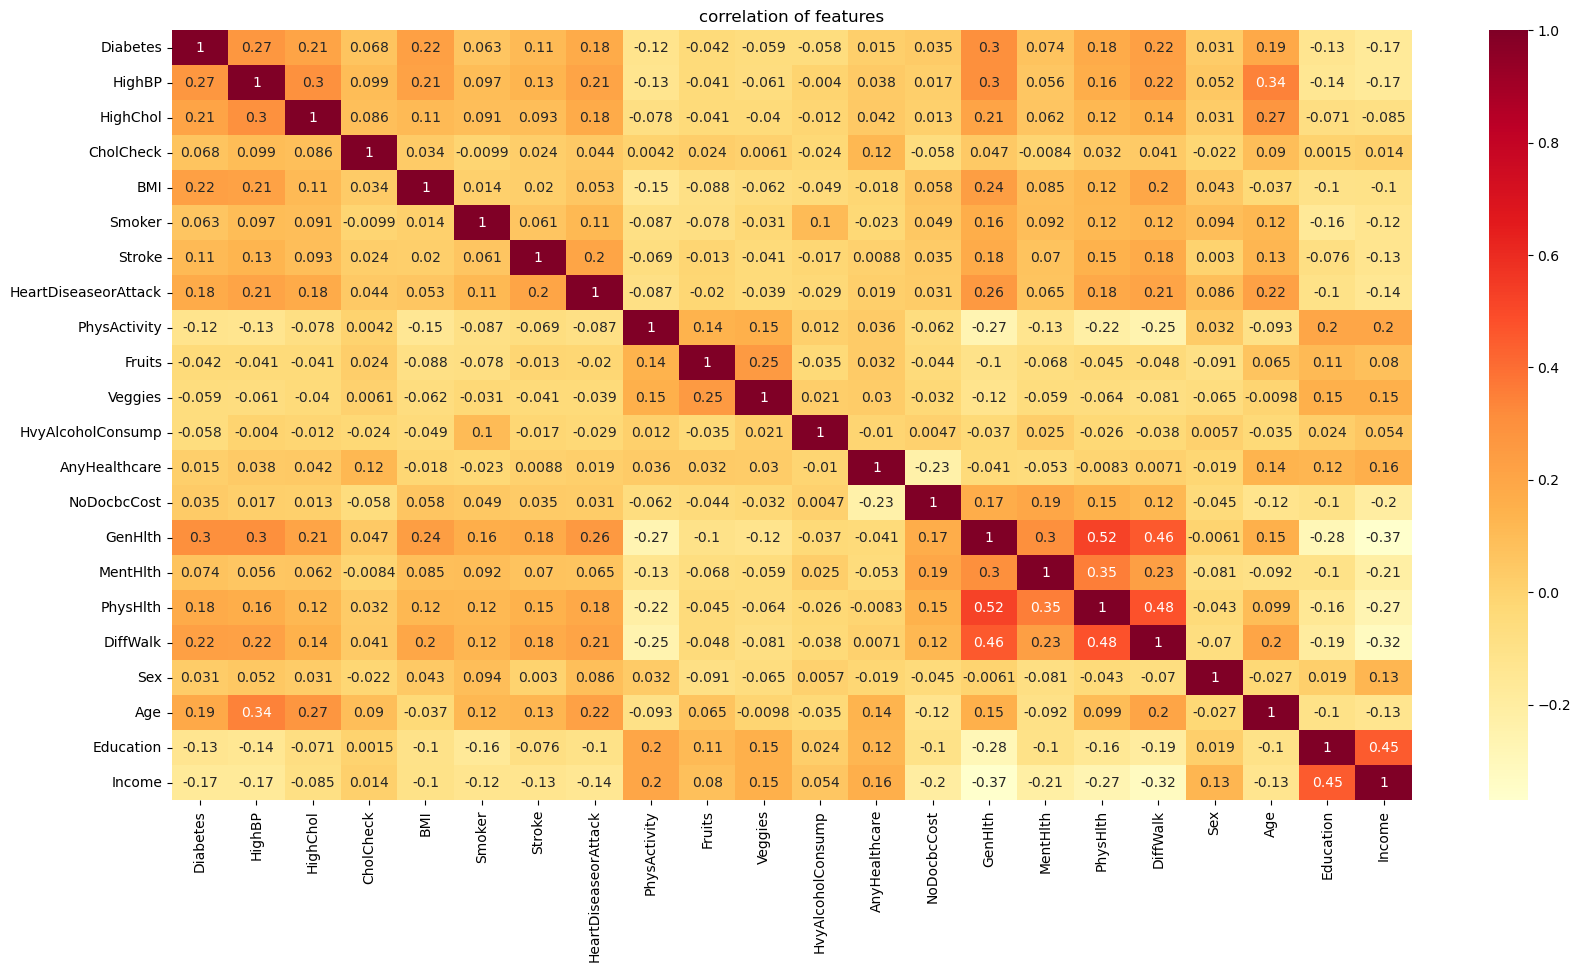

In [11]:
#using heatmap to understand correlation between columns better in dataset


plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of features")

In [14]:
#Replacing 0 into Non-Diabetic and 1 and 2 into Diabetic 
#adding new column Diabetes_str  

df1["Diabetes_str"]= df1["Diabetes"].replace({0:"Non-Diabetic",1:"Diabetic", 2:"Diabetic"})

In [17]:
#number of Diabetic patient with HighBP

pd.crosstab(df1.HighBP,df1.Diabetes_str)

Diabetes_str,Diabetic,Non-Diabetic
HighBP,,
0,10460,134391
1,29517,79312


In [19]:
# checking average of diabetic persons with HighBP and Normal BP

(df1.groupby("Diabetes_str")["HighBP"].value_counts()/df1.groupby("Diabetes_str")["HighBP"].count())*100

Diabetes_str  HighBP
Diabetic      1         73.834955
              0         26.165045
Non-Diabetic  0         62.886810
              1         37.113190
dtype: float64

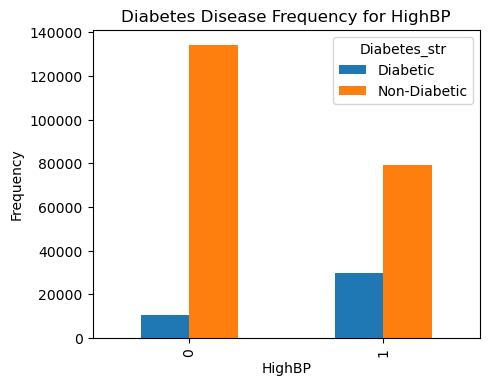

In [21]:
#Checking The relation B/W HighBP and Diabetes

pd.crosstab(df1.HighBP,df1.Diabetes_str).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()

In [23]:
#number of Diabetic patient with HighChol

pd.crosstab(df1.HighChol,df1.Diabetes_str)

Diabetes_str,Diabetic,Non-Diabetic
HighChol,,
0,13416,132673
1,26561,81030


In [25]:
# checking average of diabetic persons with High Cholesterol and Normal cholesterol

(df1.groupby("Diabetes_str")["HighChol"].value_counts()/df1.groupby("Diabetes_str")["HighChol"].count())*100

Diabetes_str  HighChol
Diabetic      1           66.440703
              0           33.559297
Non-Diabetic  0           62.082891
              1           37.917109
dtype: float64

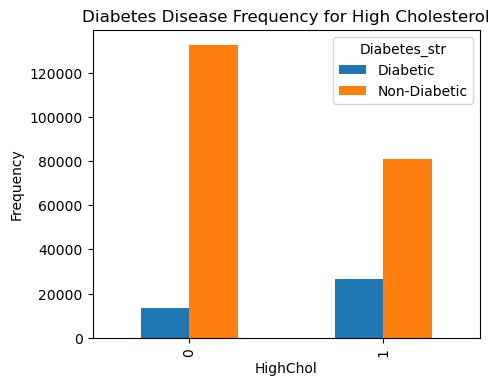

In [27]:
#Checking The relation B/W HighChol and Diabetes

pd.crosstab(df1.HighChol,df1.Diabetes_str).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for High Cholesterol')
plt.xlabel("HighChol")
plt.ylabel('Frequency')
plt.show()

In [29]:
# Combined effect of HighBP and HighChol with diabetes

(df1.groupby(["HighBP" , "HighChol"])["Diabetes_str"].value_counts()/df1.groupby(["HighBP" , "HighChol"])["Diabetes"].count())*100

HighBP  HighChol  Diabetes_str
0       0         Non-Diabetic    94.964678
                  Diabetic         5.035322
        1         Non-Diabetic    87.589388
                  Diabetic        12.410612
1       0         Non-Diabetic    81.244764
                  Diabetic        18.755236
        1         Non-Diabetic    67.162079
                  Diabetic        32.837921
dtype: float64

Text(0.5, 1.0, 'Relation b/w HighBP ,HighChol and Diabetes')

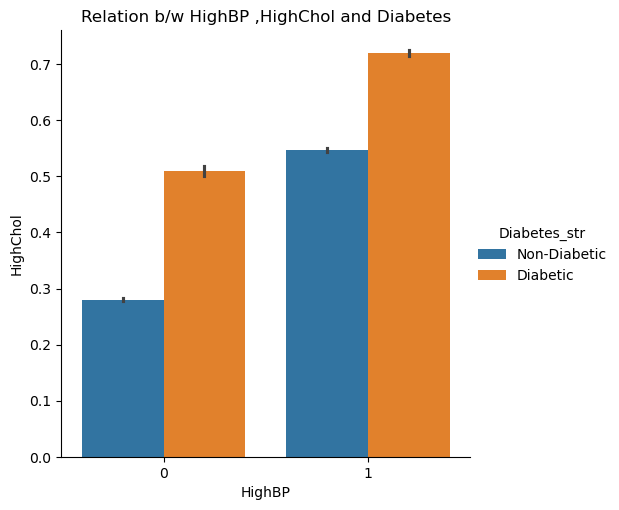

In [31]:
sns.catplot(x="HighBP" , y ="HighChol" , data = df1 , hue="Diabetes_str" , kind="bar" );
plt.title("Relation b/w HighBP ,HighChol and Diabetes")

In [49]:
# Filter the DataFrame on the basis of BMI
filtered_df_N = df1[df1["BMI"] < 25]
filtered_df_Ow = df1[(df1["BMI"] >= 25)&(df1["BMI"]<=30)]
filtered_df_Ob = df1[(df1["BMI"] > 30)]

# Count the occurrences of each category in 'Diabetes_str'
countN = filtered_df_N["Diabetes_str"].value_counts()
countOw = filtered_df_Ow["Diabetes_str"].value_counts()
countOb = filtered_df_Ob["Diabetes_str"].value_counts()

# Calculate the percentage of diabetic patients
percentage_diabetic_N = (countN.get("Diabetic", 0) / counts.sum()) * 100
percentage_diabetic_Ow = (countOw.get("Diabetic", 0) / counts.sum()) * 100
percentage_diabetic_Ob = (countOb.get("Diabetic", 0) / counts.sum()) * 100

print(f"Percentage of diabetic patients having Nomral BMI: {percentage_diabetic_N:.2f}%")
print(f"Percentage of diabetic patients having Overweight: {percentage_diabetic_Ow:.2f}%")
print(f"Percentage of diabetic patients having Obesity: {percentage_diabetic_Ob:.2f}%")

Percentage of diabetic patients having Nomral BMI: 6.68%
Percentage of diabetic patients having Overweight: 20.65%
Percentage of diabetic patients having Obesity: 28.14%


In [53]:
# Calculate the percentage
percentages = (
    df1.groupby(["Smoker", "HvyAlcoholConsump"])["Diabetes_str"]
    .value_counts() / df1.groupby(["Smoker", "HvyAlcoholConsump"])["Diabetes"]
    .count()
) * 100

# Format the values to include a percentage sign
formatted_percentages = percentages.apply(lambda x: f"{x:.2f}%")

print(formatted_percentages)

Smoker  HvyAlcoholConsump  Diabetes_str
0       0                  Non-Diabetic    85.97%
                           Diabetic        14.03%
        1                  Non-Diabetic    94.67%
                           Diabetic         5.33%
1       0                  Non-Diabetic    80.78%
                           Diabetic        19.22%
        1                  Non-Diabetic    91.65%
                           Diabetic         8.35%
dtype: object


In [55]:
percentages = (
    df1.groupby(["Stroke", "HeartDiseaseorAttack"])["Diabetes_str"]
    .value_counts() / df1.groupby(["Stroke", "HeartDiseaseorAttack"])["Diabetes"]
    .count()
) * 100

formatted_percentages = percentages.apply(lambda x: f"{x:.2f}%")

print(formatted_percentages)

Stroke  HeartDiseaseorAttack  Diabetes_str
0       0                     Non-Diabetic    86.73%
                              Diabetic        13.27%
        1                     Non-Diabetic    65.90%
                              Diabetic        34.10%
1       0                     Non-Diabetic    71.74%
                              Diabetic        28.26%
        1                     Non-Diabetic    55.88%
                              Diabetic        44.12%
dtype: object


Text(0.5, 1.0, 'Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes')

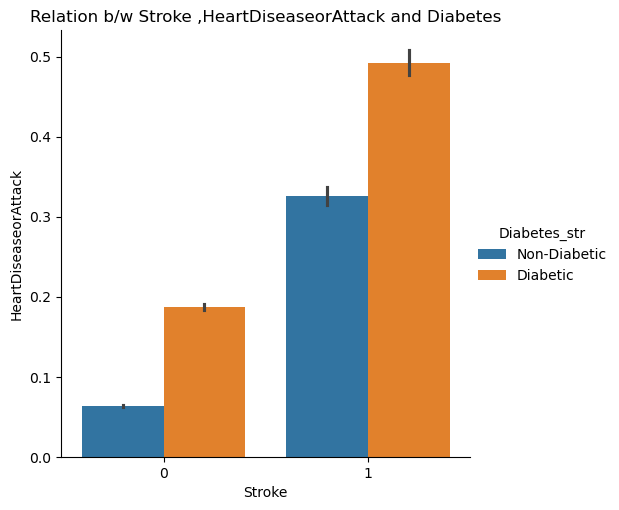

In [58]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = df1 , hue="Diabetes_str"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")

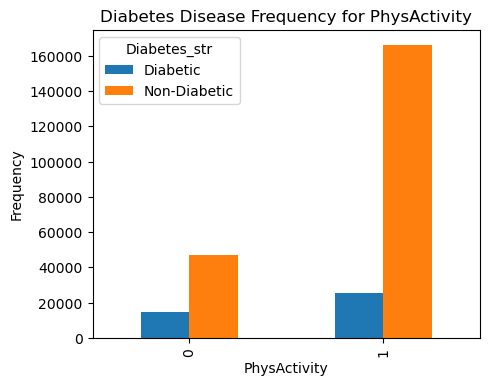

In [60]:
pd.crosstab(df1.PhysActivity,df1.Diabetes_str).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for PhysActivity')
plt.xlabel("PhysActivity")
plt.ylabel('Frequency')
plt.show()

In [62]:
percentages = (
    df1.groupby(["Fruits", "Veggies"])["Diabetes_str"]
    .value_counts() / df1.groupby(["Fruits", "Veggies"])["Diabetes"]
    .count()
) * 100

formatted_percentages = percentages.apply(lambda x: f"{x:.2f}%")

print(formatted_percentages)

Fruits  Veggies  Diabetes_str
0       0        Non-Diabetic    79.95%
                 Diabetic        20.05%
        1        Non-Diabetic    83.29%
                 Diabetic        16.71%
1       0        Non-Diabetic    79.47%
                 Diabetic        20.53%
        1        Non-Diabetic    86.16%
                 Diabetic        13.84%
dtype: object


In [64]:
percentages = (
    df1.groupby(["Fruits", "Veggies", "PhysActivity"])["Diabetes_str"]
    .value_counts() / df1.groupby(["Fruits", "Veggies", "PhysActivity"])["Diabetes"]
    .count()
) * 100

formatted_percentages = percentages.apply(lambda x: f"{x:.2f}%")

print(formatted_percentages)

Fruits  Veggies  PhysActivity  Diabetes_str
0       0        0             Non-Diabetic    75.49%
                               Diabetic        24.51%
                 1             Non-Diabetic    83.09%
                               Diabetic        16.91%
        1        0             Non-Diabetic    77.21%
                               Diabetic        22.79%
                 1             Non-Diabetic    85.68%
                               Diabetic        14.32%
1       0        0             Non-Diabetic    72.63%
                               Diabetic        27.37%
                 1             Non-Diabetic    82.76%
                               Diabetic        17.24%
        1        0             Non-Diabetic    77.24%
                               Diabetic        22.76%
                 1             Non-Diabetic    88.13%
                               Diabetic        11.87%
dtype: object


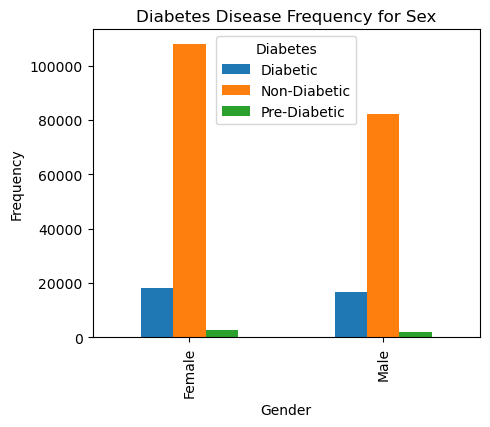

In [66]:
pd.crosstab(df.Gender,df.Diabetes).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Sex')
plt.xlabel("Gender")
plt.ylabel('Frequency')
plt.show()

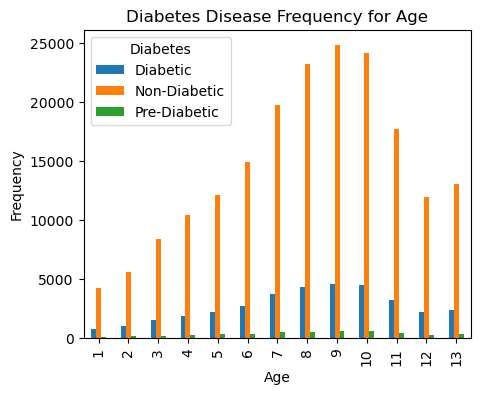

In [70]:
pd.crosstab(df1.Age,df.Diabetes).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

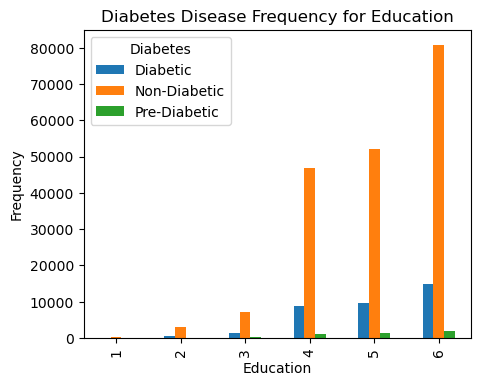

In [72]:
pd.crosstab(df1.Education,df.Diabetes).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Education')
plt.xlabel("Education")
plt.ylabel('Frequency')
plt.show()

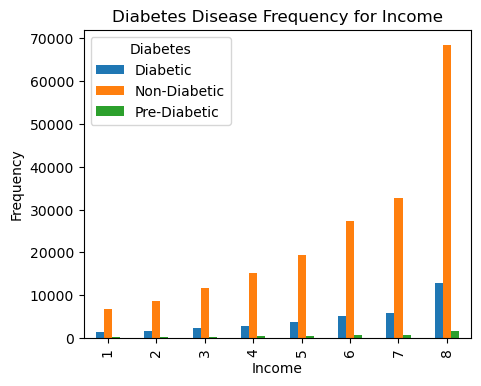

In [74]:
pd.crosstab(df1.Income,df.Diabetes).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Income')
plt.xlabel("Income")
plt.ylabel('Frequency')
plt.show()